In [1]:
# 1. 그래프 plotly로 바꾸기
# 2. 고객분류니까 비지도 학습 한 번 해보고 실루엣계수, 실루엣그래프 그려보기
# 3. readme 예쁘게 작성, 깃꾸하기
# 4. stremlit으로 만들기
# 5. 22일 저녁 7시까지 끝내기

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [9]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# 한글깨짐 방지
plt.rc('font', family='AppleGothic')

In [4]:
# 데이터 불러오기
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
# 데이터 기본정보 확인, null값 없음
# 수치형 번수 중에서 0으로 된 값도 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
# 나이
# 성별
# 구입 상품
# 상품 카테고리
# 금액
# 위치 
# 사이즈
# 컬러
# 시즌
# 리뷰점수
# 구독여부
# 배송타입
# 할인적용 여부
# 프로모션코드 사용여부
# 지불 방법
# 구매빈도

In [7]:
# 데이터 기본정보 확인
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


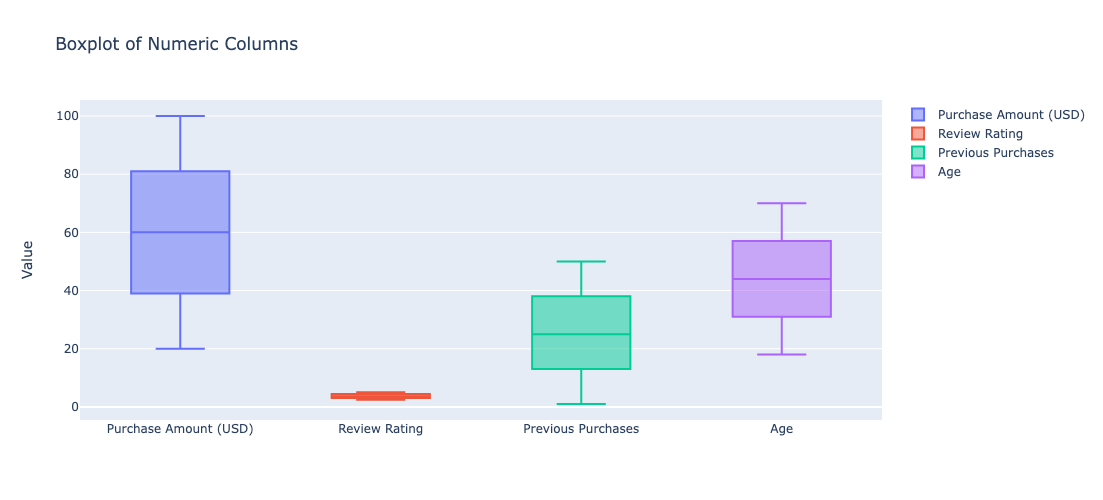

In [11]:
# 수치형변수 이상치 확인

fig = go.Figure()

fig.add_trace(go.Box(y=df['Purchase Amount (USD)'], name='Purchase Amount (USD)'))
fig.add_trace(go.Box(y=df['Review Rating'], name='Review Rating'))
fig.add_trace(go.Box(y=df['Previous Purchases'], name='Previous Purchases'))
fig.add_trace(go.Box(y=df['Age'], name='Age'))

fig.update_layout(title='Boxplot of Numeric Columns',
                  xaxis=dict(title=''),
                  yaxis=dict(title='Value'),
                  width=800,  
                  height=500)  

fig.show()

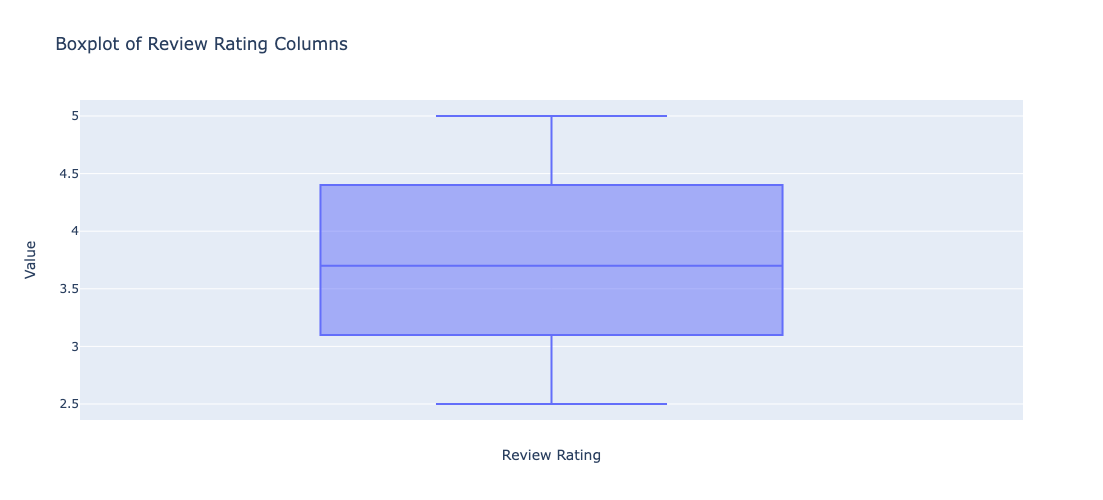

In [34]:
# 모든 컬럼이 이상치가 없음 
# Review Rating 컬럼이 잘 안보이므로 Review Rating만 따로 한 번 보기 -> 이것도 역시 이상치 없음

fig = px.box(df, y='Review Rating', 
             title='Boxplot of Review Rating Columns',
             width=300, height=500)  

fig.update_layout(xaxis_title='Review Rating', yaxis_title='Value')  
fig.show()

In [15]:
# 상관계수 확인을 위해 범주형 컬럼을 수치형으로 변경
# 범주형 컬럼 : Gender, Subscription Status, Discount Applied, Frequency of Purchases

In [16]:
# Gender 컬럼 수치형으로 변경하는 함수

def gender_to_num(gender):
  if gender == 'Male':
    return 0
  else:
    return 1

In [17]:
# 수치형으로 변경한 Gender 컬럼 생성

df['gender'] = df['Gender'].apply(gender_to_num)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0


In [18]:
# Subscription Status 컬럼 수치형으로 변경하는 함수

def subscription_to_num(subscription_status):
  if subscription_status == 'No':
    return 0
  else:
    return 1

In [19]:
# 수치형으로 변경한 Subscription Status 컬럼 생성

df['subscription_status'] = df['Subscription Status'].apply(subscription_to_num)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,1


In [20]:
# Discount Applied 컬럼 수치형으로 변경 함수

def discount_to_num(discount_applied):
  if discount_applied == 'No':
    return 0
  else:
    return 1

In [21]:
# 수치형으로 변경한 Discount Applied 컬럼 생성

df['discount_applied'] = df['Discount Applied'].apply(discount_to_num)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,1,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,1,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,1,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,1,1


In [22]:
# Frequency of Purchases 컬럼 수치형으로 변경하는 함수

def frequency_to_num(frequency_of_purchases):
  if frequency_of_purchases == 'Weekly':
    return 5
  elif frequency_of_purchases in ['Fortnightly', 'Bi-Weekly']:
    return 4
  elif frequency_of_purchases == 'Monthly':
    return 3
  elif frequency_of_purchases in ['Every 3 Months', 'Quarterly']:
    return 2
  else:
    return 1

In [23]:
# 수치형으로 변경한 Frequency of Purchases 컬럼 생성

df['frequency_of_purchases'] = df['Frequency of Purchases'].apply(frequency_to_num)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,0,1,1,4
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,0,1,1,4
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,1,1,5
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,1,1,5
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,0,1,1,1


In [25]:
# 수치형으로 변경한 컬럼 확인
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,0,1,1,4
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,0,1,1,4
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,1,1,5
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,1,1,5
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,0,1,1,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [28]:
# 컬럼별 상관계수 확인

corr=df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'gender', 
       'subscription_status', 'discount_applied', 'frequency_of_purchases']].corr(method='pearson')
corr

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,gender,subscription_status,discount_applied,frequency_of_purchases
Age,1.000000,-0.010424,-0.021949,0.040445,-0.002763,0.006492,0.004366,-0.009725
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063,0.014044,-0.006996,-0.017798,-0.012473
Review Rating,-0.021949,0.030776,1.000000,0.004229,-0.008164,-0.006368,-0.012486,-0.004025
Previous Purchases,0.040445,0.008063,0.004229,1.000000,-0.035873,0.030859,0.023537,0.005258
gender,-0.002763,0.014044,-0.008164,-0.035873,1.000000,-0.417197,-0.595823,0.004067
subscription_status,0.006492,-0.006996,-0.006368,0.030859,-0.417197,1.000000,0.700202,0.011689
discount_applied,0.004366,-0.017798,-0.012486,0.023537,-0.595823,0.700202,1.000000,0.006064
frequency_of_purchases,-0.009725,-0.012473,-0.004025,0.005258,0.004067,0.011689,0.006064,1.000000


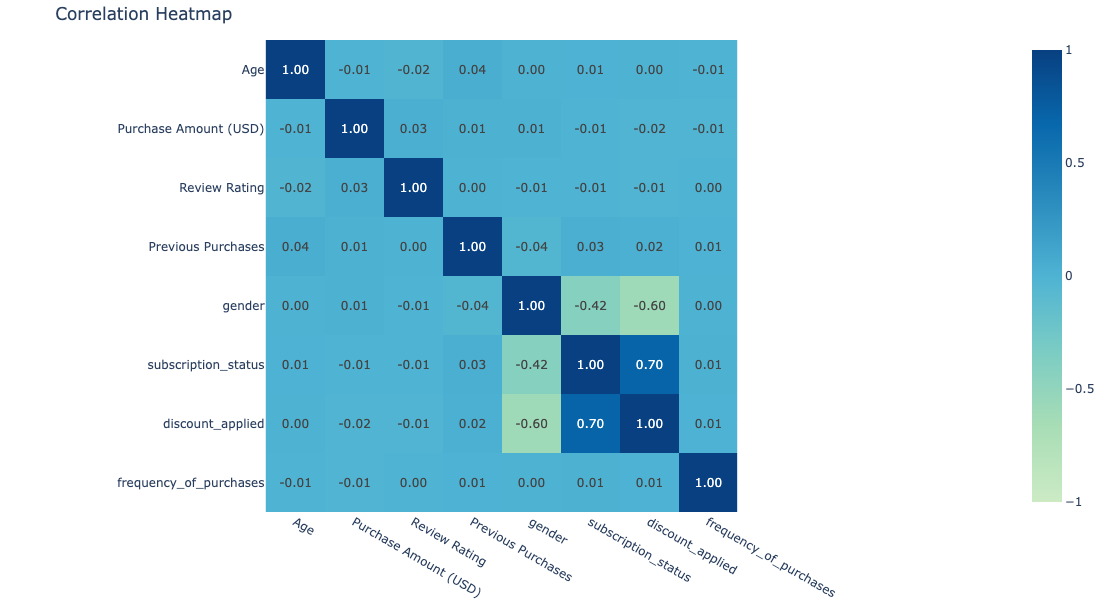

In [160]:
fig = px.imshow(corr.values,
                x=corr.columns,
                y=corr.index,
                text_auto = '.2f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],  
                color_continuous_midpoint=0,  
                labels=dict(x='', y=''),  
                title='Correlation Heatmap')

fig.update_layout(width=800, 
                  height=600,  
                  margin=dict(l=0, r=0, t=40, b=0))  

fig.show()

In [37]:
# Frequency of Purchases 컬럼을 일년 예상구매 횟수로 바꾸는 함수(예상 구매 횟수)
def times_per_annual(frequency_of_purchases):
  if frequency_of_purchases in ['Bi-Weekly', 'Fortnightly']:
    return 26
  elif frequency_of_purchases in ['Every 3 Months', 'Quarterly']:
    return 4
  elif frequency_of_purchases == 'Weekly':
    return 52
  elif frequency_of_purchases == 'Annually':
    return 1
  elif frequency_of_purchases == 'Monthly':
    return 12

In [38]:
# 일년 예상구매 횟수 컬럼 생성
df['purchases_times_per_annual'] = df['Frequency of Purchases'].apply(times_per_annual)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,0,1,1,4,26
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,0,1,1,4,26
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,0,1,1,5,52
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,0,1,1,5,52
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,0,1,1,1,1


In [156]:
# 고객 남녀 수 확인

df_gender_count =df.groupby('Gender')['Customer ID'].count().sort_values(ascending=False)
df_gender_count

Gender
Male      2652
Female    1248
Name: Customer ID, dtype: int64

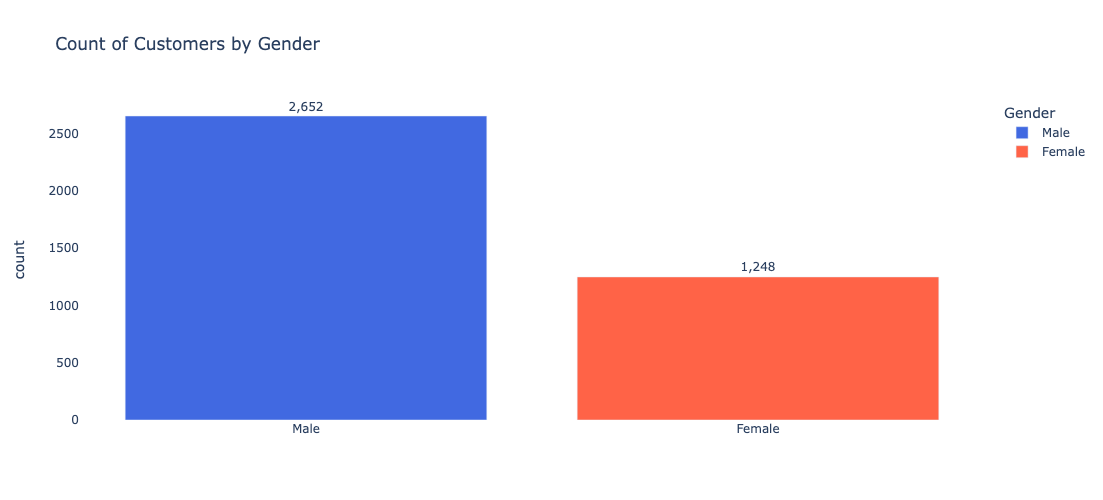

In [372]:
# 고객 남녀 수 그래프

fig = px.bar(df_gender_count, x=df_gender_count.index, y=df_gender_count.values, 
             title='Count of Customers by Gender',
             color=df_gender_count.index,
             color_discrete_sequence=['royalblue', 'tomato'],
             text=df_gender_count.values)  

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='',  
    yaxis_title='count',  
    width=600,  
    height=500,
    plot_bgcolor='white'
)

fig.show()

In [39]:
# 고객 남녀 성비 확인
df_gender = df.groupby('Gender')['Customer ID'].count().sort_values(ascending=False)/df['Customer ID'].count()*100
pd.DataFrame(df_gender)

,Customer ID
Gender,
Male,68.0
Female,32.0


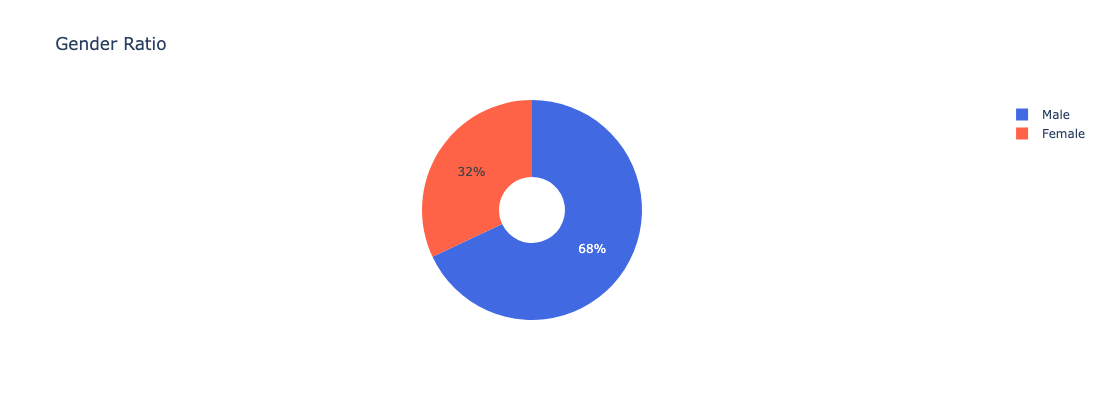

In [393]:
# 고객 남녀 비율 그래프

fig = px.pie(df_gender, values=df_gender, names=df_gender.index,
             title='Gender Ratio', color_discrete_sequence=['royalblue', 'tomato'],  
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [57]:
# Age 컬럼을 구간별로 나누는 함수
def age_cat(age):
  return str((age//10) * 10) + '대'

In [59]:
# Age 컬럼을 구간별로 카테고리화한 컬럼 생성
df['age_group'] = df['Age'].apply(age_cat)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,0,1,1,4,26,50대
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,0,1,1,4,26,10대
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,0,1,1,5,52,50대
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,0,1,1,5,52,20대
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,0,1,1,1,1,40대


In [60]:
# 고객 연령대 확인
df_by_agegroup = df.groupby('age_group')['Customer ID'].count()
pd.DataFrame(df_by_agegroup)

,Customer ID
age_group,
10대,150
20대,728
30대,724
40대,739
50대,771
60대,721
70대,67


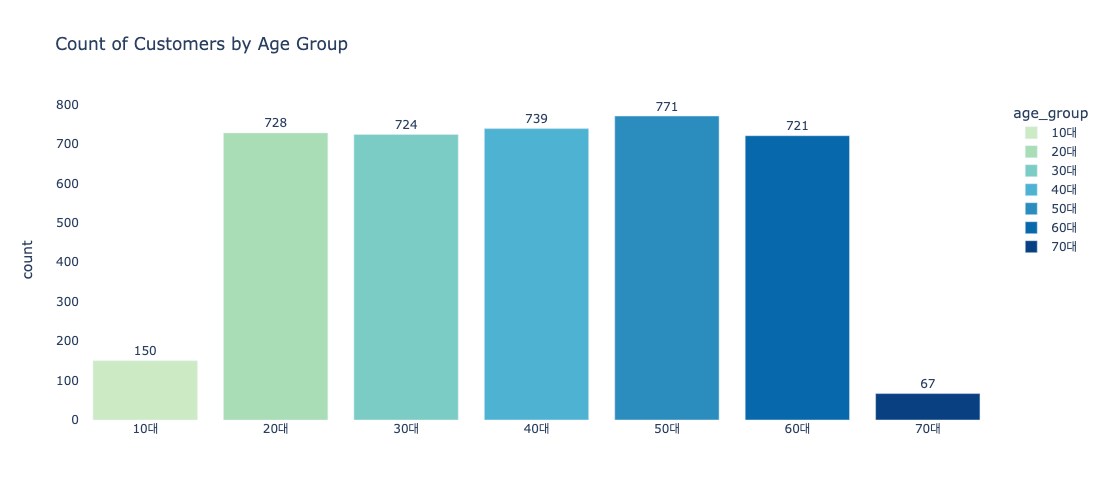

In [181]:
# 고객 연령대별 판매량 그래프

fig = px.bar(df_by_agegroup, x=df_by_agegroup.index, y=df_by_agegroup.values, 
             title='Count of Customers by Age Group',
             color=df_by_agegroup.index,
             color_discrete_sequence=px.colors.sequential.GnBu[2:],
             text=df_by_agegroup.values)  

fig.update_traces(textposition='outside')  

fig.update_layout(
    xaxis_title='',
    yaxis_title='count', 
    width=600, 
    height=500,
    plot_bgcolor='white'
)

fig.show()

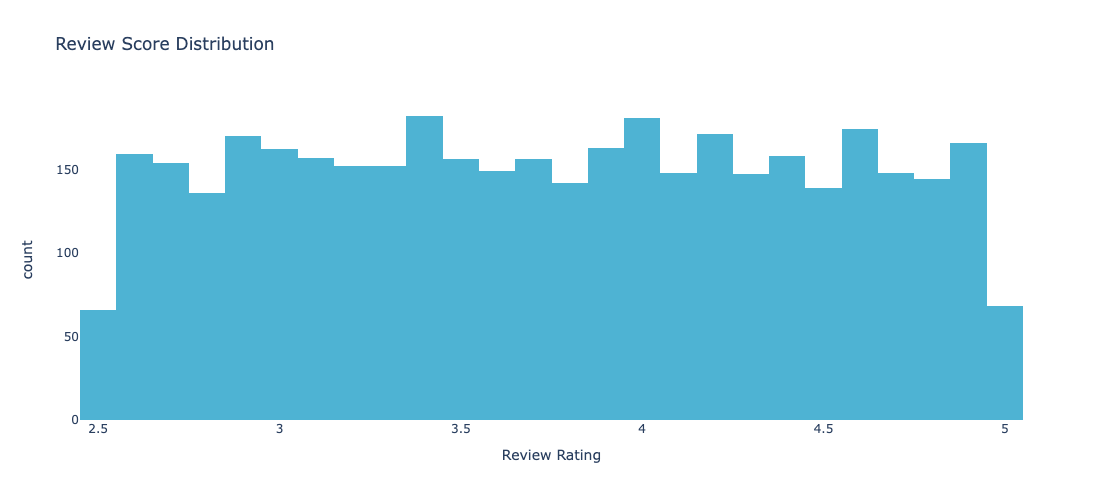

In [182]:
fig = px.histogram(df, x='Review Rating', nbins=50, 
                   title='Review Score Distribution',
                   color_discrete_sequence=[px.colors.sequential.GnBu[5]])

fig.update_layout(width=600,  
                  height=500,
                  plot_bgcolor='white')  

fig.show() 

In [86]:
# Size별 판매량 확인
df_by_size = df.groupby('Size')['Customer ID'].count().sort_index().loc[['S', 'M', 'L', 'XL']]
df_by_size

Size
S      663
M     1755
L     1053
XL     429
Name: Customer ID, dtype: int64

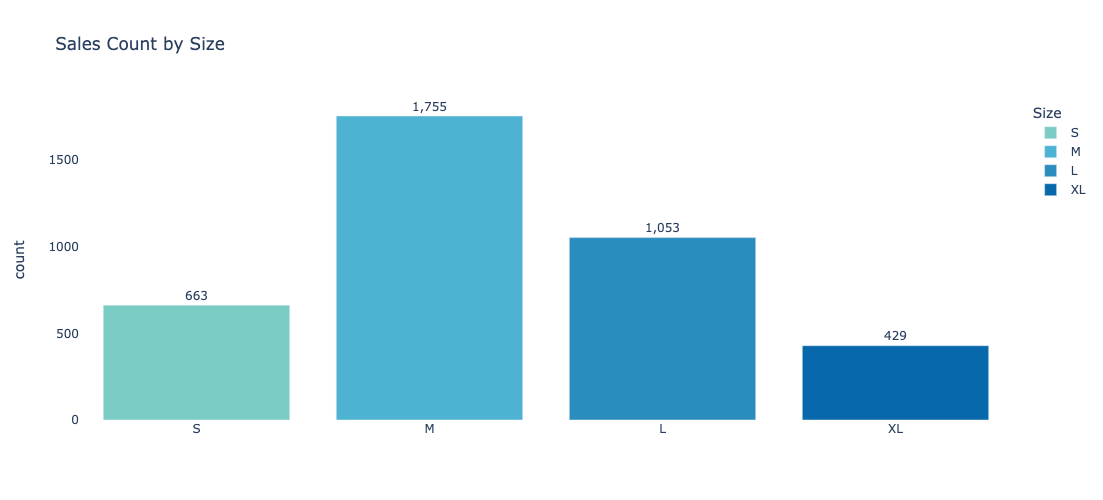

In [371]:
fig = px.bar(df_by_size, x=df_by_size.index, y=df_by_size.values,
             title='Sales Count by Size',
             color=df_by_size.index,  
             color_discrete_sequence=px.colors.sequential.GnBu[4:])  

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(width=600,  
                  height=500, 
                  xaxis_title='',  
                  yaxis_title='count',  
                  plot_bgcolor='white')  

fig.show()

In [290]:
# Location별 판매량 확인
df_by_location = df.groupby('Location')['Customer ID'].count().sort_values(ascending=False)
pd.DataFrame(df_by_location)

,Customer ID
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
Nevada,87
New York,87


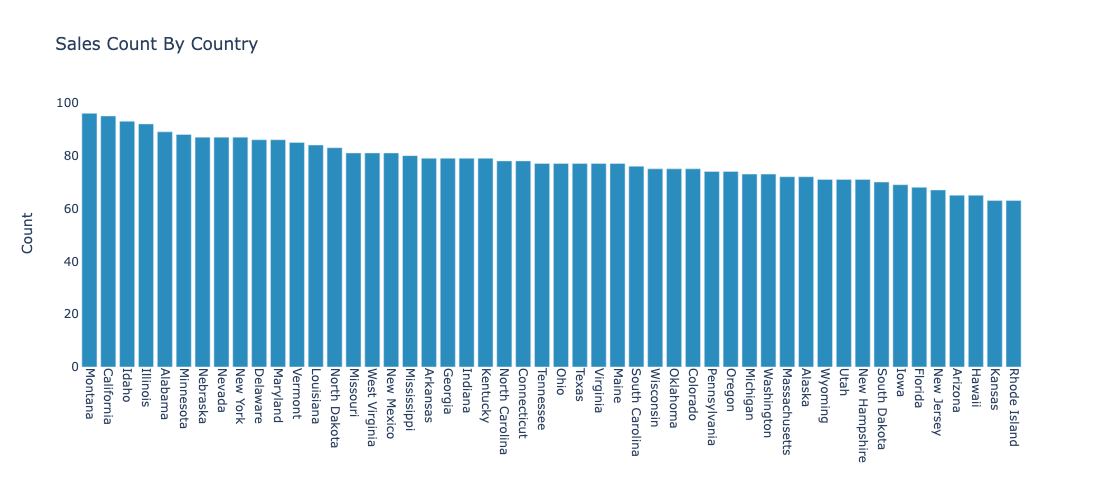

In [291]:
# 국가별 판매수량

fig = px.bar(df_by_location, x=df_by_location.index, y=df_by_location.values,
             title='Sales Count By Country',
             color=df_by_location.index,
             color_discrete_sequence=['rgb(43, 140, 190)'])

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Count',  
    xaxis_tickangle=90,  
    width=1000,  
    height=500,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [277]:
# Payment Method별 거래수 확인
df_by_payment = df['Payment Method'].value_counts().sort_values()
pd.DataFrame(df_by_payment)

,count
Payment Method,
Bank Transfer,612
Venmo,634
Debit Card,636
Cash,670
Credit Card,671
PayPal,677


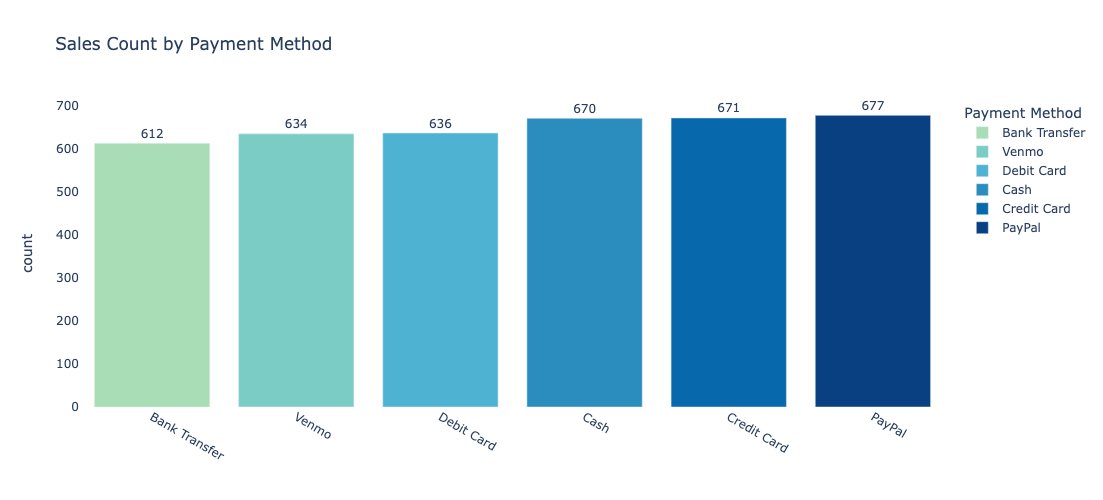

In [294]:
# Payment Method별 거래수 그래프

fig = px.bar(df_by_payment, x=df_by_payment.index, y='count',
             title='Sales Count by Payment Method',
             color=df_by_payment.index,  
             color_discrete_sequence=px.colors.sequential.GnBu[3:])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',  
    xaxis_tickangle=30,  
    width=800,  
    height=500,
    plot_bgcolor='white')

fig.show()

In [285]:
# Shipping Type별 거래수 확인
df_by_shipping = df['Shipping Type'].value_counts().sort_values()
pd.DataFrame(df_by_shipping)

,count
Shipping Type,
2-Day Shipping,627
Express,646
Next Day Air,648
Store Pickup,650
Standard,654
Free Shipping,675


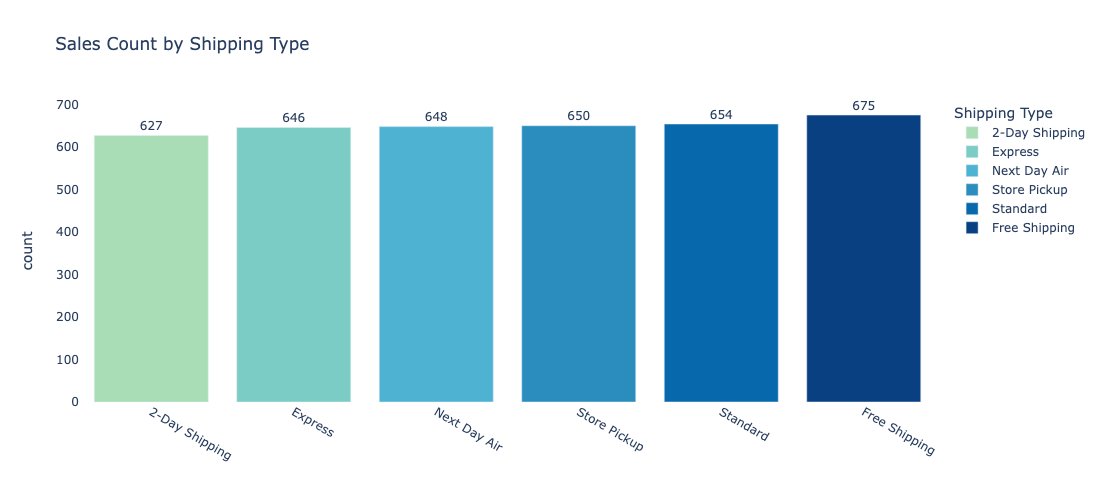

In [286]:
# Shipping Type별 거래수 그래프

fig = px.bar(df_by_shipping, x=df_by_shipping.index, y='count',
             title='Sales Count by Shipping Type',
             color=df_by_shipping.index,  
             color_discrete_sequence=px.colors.sequential.GnBu[3:])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',  
    xaxis_tickangle=30,  
    width=800,  
    height=500,
    plot_bgcolor='white')

fig.show()

In [296]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'gender',
       'subscription_status', 'discount_applied', 'frequency_of_purchases',
       'purchases_times_per_annual', 'age_group'],
      dtype='object')

In [297]:
# 이제 심층분석 : 보통 매출 증대를 위해 할인 프로모션을 하는 경우가 많으니 할인 프로모션을 생각해보자
# 할인 프로모션을 하는 것이 타당한지 보기 위해 매출액, 구매빈도와 할인적용 컬럼의 상관관계를 보자

# 구매금액(Purchase Amount)컬럼, 할인(Discount Applied)컬럼, 1년동안의 예상 구매 횟수(purchased_times_per_annual)컬럼의 상관계수 확인

corr2 = df[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr2

,Purchase Amount (USD),discount_applied,purchases_times_per_annual
Purchase Amount (USD),1.000000,-0.017798,-0.013138
discount_applied,-0.017798,1.000000,0.004334
purchases_times_per_annual,-0.013138,0.004334,1.000000


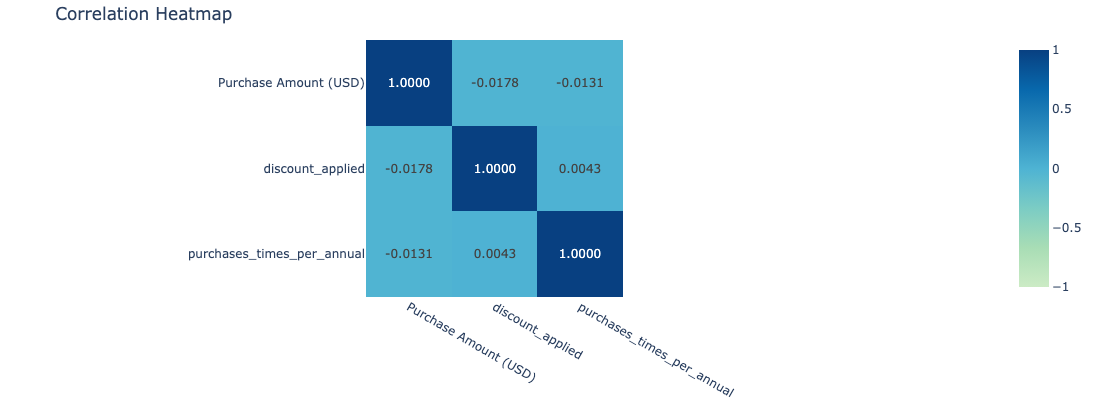

In [309]:
fig = px.imshow(corr2.values,
                x=corr2.columns,
                y=corr2.index,
                text_auto = '.4f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],
                color_continuous_midpoint=0,
                title='Correlation Heatmap')

fig.update_layout(
    width=600,
    height=400,
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

In [311]:
# 전체고객을 대상으로 보면 상관관계가 있어보이지 않는다. 심슨의 역설이 생길 수 있으니 Regular고객과 VIP고객으로 클러스터링 한 후 상관관계가 있는지 확인하자

In [312]:
# VIP고객부터 확인
# VIP 정의 : Frequency of Purchases 컬럼을 바탕으로 1년동안의 구매횟수를 추정하여 purchases_times_per_annual컬럼 생성
# purchases_times_per_annual 컬럼에서 1년에 26회 이상 구매한 고객을 VIP, 미만은 Regular 고객이라 지칭

In [313]:
# VIP-Regular 고객으로 카테고리화 하는 함수

def customer_re_grouping(purchases_times_per_annual):
  if purchases_times_per_annual >= 26:
    return 'VIP'
  else:
    return 'Regular'

In [314]:
# VIP-Regular 카테고리화 된 컬럼 생성
df['customer_type2'] = df['purchases_times_per_annual'].apply(customer_re_grouping)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,age_group,customer_type2
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,0,1,1,4,26,50대,VIP
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,0,1,1,4,26,10대,VIP
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,0,1,1,5,52,50대,VIP
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,0,1,1,5,52,20대,VIP
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,31,PayPal,Annually,0,1,1,1,1,40대,Regular


In [315]:
# VIP고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관관계 보기

df_by_VIP = df[df['customer_type2'] == 'VIP']
corr3 = df_by_VIP[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr3

,Purchase Amount (USD),discount_applied,purchases_times_per_annual
Purchase Amount (USD),1.000000,-0.016324,-0.018021
discount_applied,-0.016324,1.000000,0.003294
purchases_times_per_annual,-0.018021,0.003294,1.000000


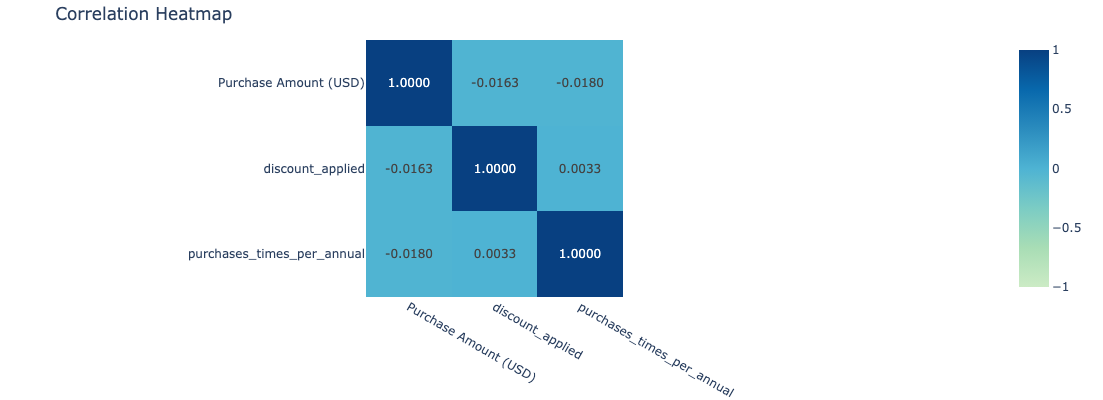

In [316]:
# VIP고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관계수 그래프

fig = px.imshow(corr3.values,
                x=corr3.columns,
                y=corr3.index,
                text_auto = '.4f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],
                color_continuous_midpoint=0,
                title='Correlation Heatmap')

fig.update_layout(
    width=600,
    height=400,
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

In [317]:
# Regular 고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관관계 보기

df_by_Regualr = df[df['customer_type2'] == 'Regular']
corr4 = df_by_Regualr[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr4

,Purchase Amount (USD),discount_applied,purchases_times_per_annual
Purchase Amount (USD),1.000000,-0.018818,-0.013657
discount_applied,-0.018818,1.000000,0.004628
purchases_times_per_annual,-0.013657,0.004628,1.000000


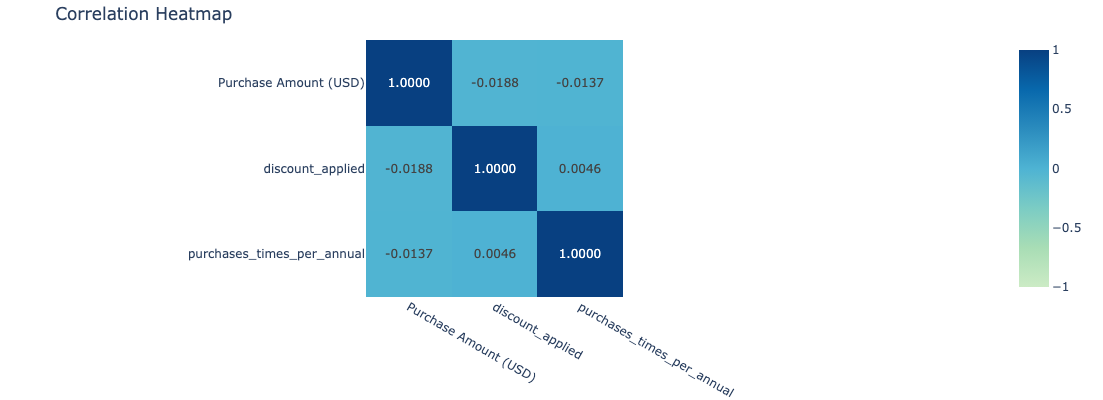

In [318]:
# Regular 고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관계수 그래프

fig = px.imshow(corr4.values,
                x=corr4.columns,
                y=corr4.index,
                text_auto = '.4f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],
                color_continuous_midpoint=0,
                title='Correlation Heatmap')

fig.update_layout(
    width=600,
    height=400,
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

In [63]:
# 그룹을 나눈 후에도 상관관계가 없어 보이므로 할인프로모션은 제외
# 그러면 VIP와 Regular 고객을 타겟팅해서 프로모션을 할지 전체고객을 대상으로 할지 결정을 해야 하므로
# 평균 구매단가를 전체를 대상으로도 보고 Regular-VIP고객을 그룹핑한 다음에도 보자.

In [319]:
# 전체 고객 평균 구매단가 확인
df['Purchase Amount (USD)'].mean()

59.76435897435898

In [320]:
# 거래당 결제금액 중앙값 확인
df['Purchase Amount (USD)'].median()

60.0

In [324]:
# VIP-Regular고객 그룹핑한 후 평균단가 확인

df_by_type2_USD = df.groupby('customer_type2')['Purchase Amount (USD)'].mean()
pd.DataFrame(df_by_type2_USD)

,Purchase Amount (USD)
customer_type2,
Regular,59.897887
VIP,59.578010


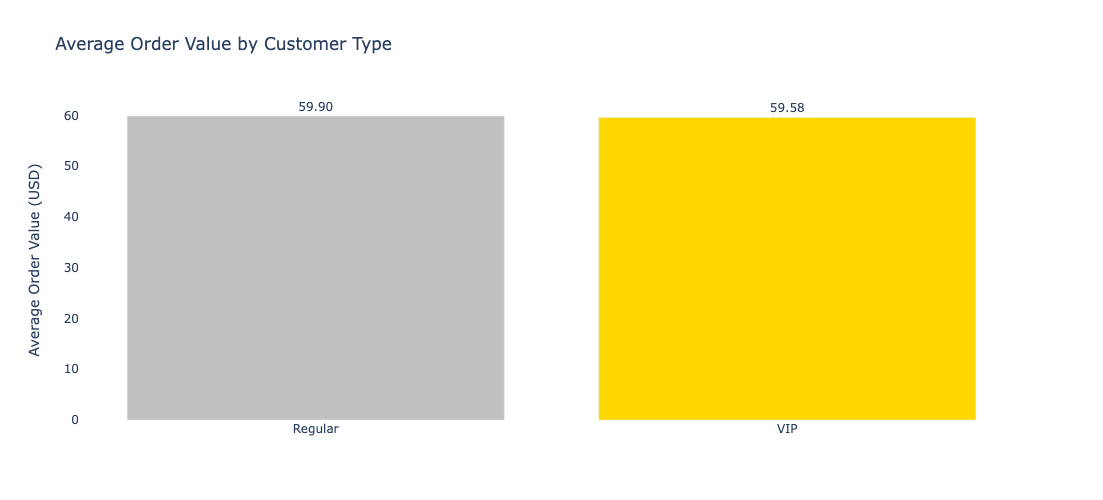

In [367]:
# 고객등급별 객단가

fig = px.bar(df_by_type2_USD, x=df_by_type2_USD.index, y=df_by_type2_USD.values,
             title='Average Order Value by Customer Type',
             color=df_by_type2_USD.index, 
             color_discrete_sequence=['silver', 'gold'])

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Average Order Value (USD)',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [360]:
# 거래당 구매단가는 VIP나 Regular고객이나 비슷하다. 그러면 다음으로 보아야 할 것은 연간 구매횟수이다.
# 평균 구매단가 * 연간 구매횟수 = 1년 예상 매출액

In [361]:
# '평균 구매단가 * 연간 구매횟수' 컬럼 만들기
# 평균 구매 단가를 반올림해서 $60이라고 가정하고 각 ID별로 1년 예상 구매금액 컬럼을 생성하자!

# 1년 예상 매출액 컬럼 생성
df["projected_revenue"] = 60 * df['purchases_times_per_annual']
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,age_group,customer_type2,projected_revenue
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Venmo,Fortnightly,0,1,1,4,26,50대,VIP,1560
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Cash,Fortnightly,0,1,1,4,26,10대,VIP,1560
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,0,1,1,5,52,50대,VIP,3120
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,0,1,1,5,52,20대,VIP,3120
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,PayPal,Annually,0,1,1,1,1,40대,Regular,60


In [362]:
# VIP-Regular고객 1년 예상 매출액 확인
df_revenue = df.groupby('customer_type2')['projected_revenue'].sum()
pd.DataFrame(df_revenue)

,projected_revenue
customer_type2,
Regular,707760
VIP,3380520


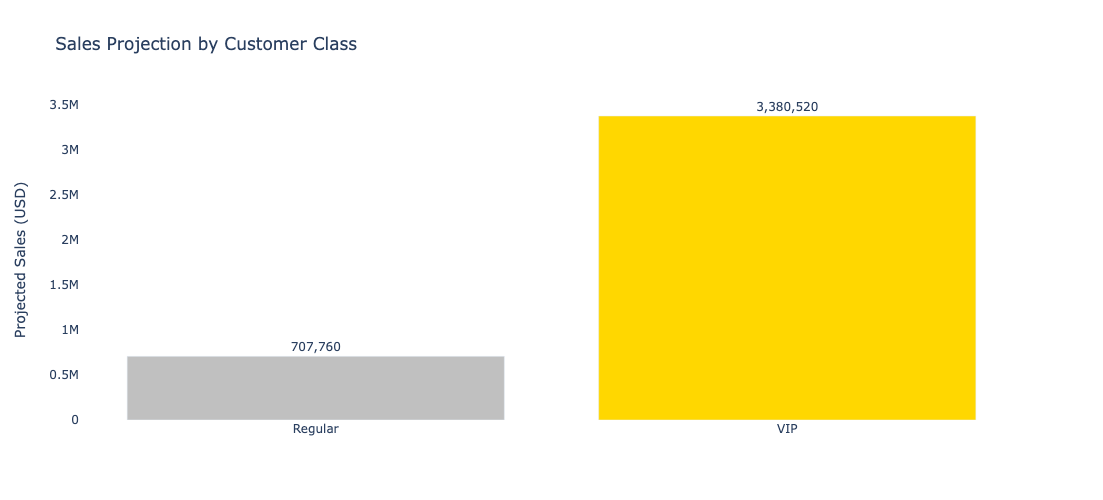

In [400]:
# VIP-Regular고객 1년 예상 매출액 그래프

fig = px.bar(df_revenue, x=df_revenue.index, y=df_revenue.values,
             title='Sales Projection by Customer Class',
             color=df_revenue.index, 
             color_discrete_sequence=['silver', 'gold'])

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Projected Sales (USD)',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [375]:
# VIP-Regular고객 예상매출 비율 확인

df_revenue_prop = df.groupby('customer_type2')['projected_revenue'].sum()/df['projected_revenue'].sum()*100
pd.DataFrame(df_revenue_prop)

,projected_revenue
customer_type2,
Regular,17.311926
VIP,82.688074


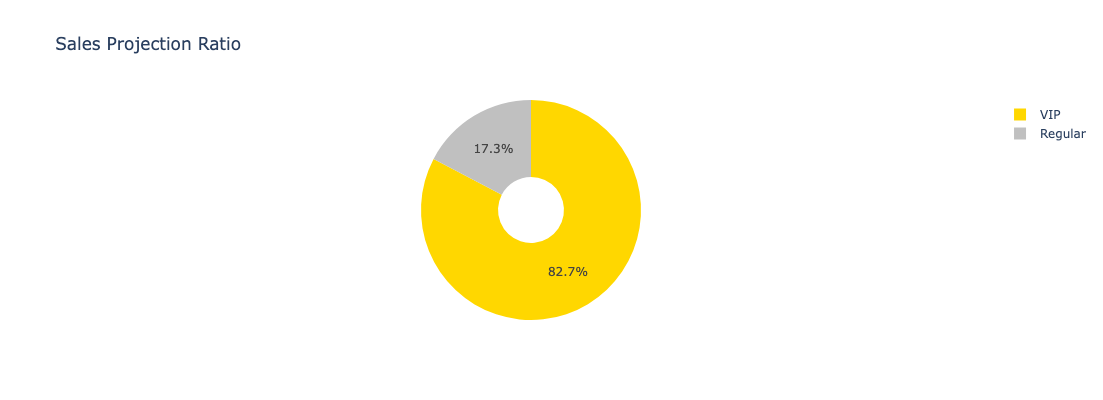

In [383]:
# VIP-Regular고객 예상매출액 비율 그래프

fig = px.pie(df_revenue_prop, values=df_revenue_prop, names=df_revenue_prop.index,
             title='Sales Projection Ratio', color_discrete_sequence=['gold', 'silver'], 
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [395]:
# VIP-Regular고객 1명당 예상 매출액(1년 기준)
df_revenue_per_member = df.groupby('customer_type2')['projected_revenue'].mean()
pd.DataFrame(df_revenue_per_member)

,projected_revenue
customer_type2,
Regular,311.514085
VIP,2076.486486


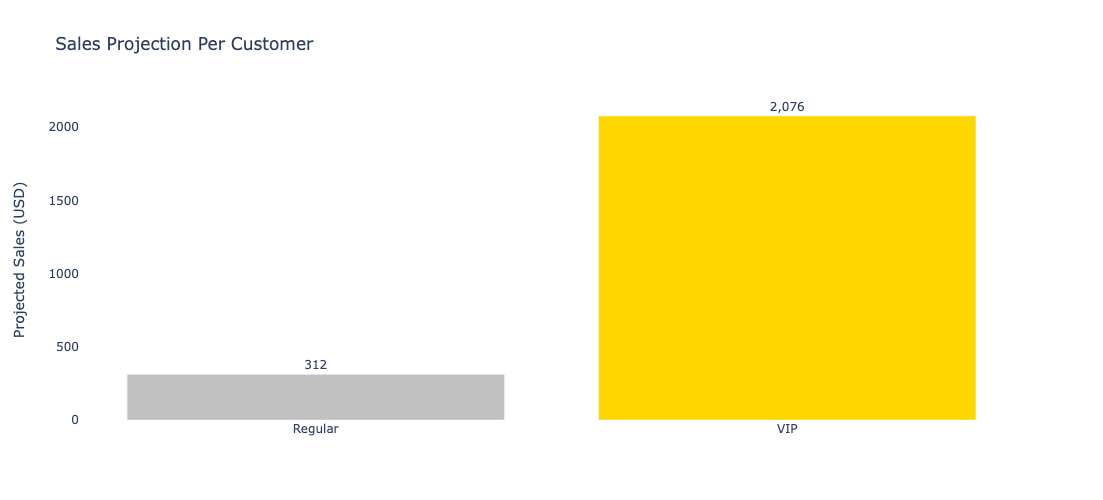

In [399]:
# VIP-Regular고객 1명당 예상 매출액(1년 기준) 그래프

fig = px.bar(df_revenue_per_member, x=df_revenue_per_member.index, y=df_revenue_per_member.values,
             title='Sales Projection Per Customer',
             color=df_revenue_per_member.index, 
             color_discrete_sequence=['silver', 'gold'])

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Projected Sales (USD)',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [401]:
# VIP-Regular 고객 비율 확인
df_by_type2_prop = df.groupby('customer_type2')['Customer ID'].count()/df['Customer ID'].count()*100
pd.DataFrame(df_by_type2_prop)

,Customer ID
customer_type2,
Regular,58.25641
VIP,41.74359


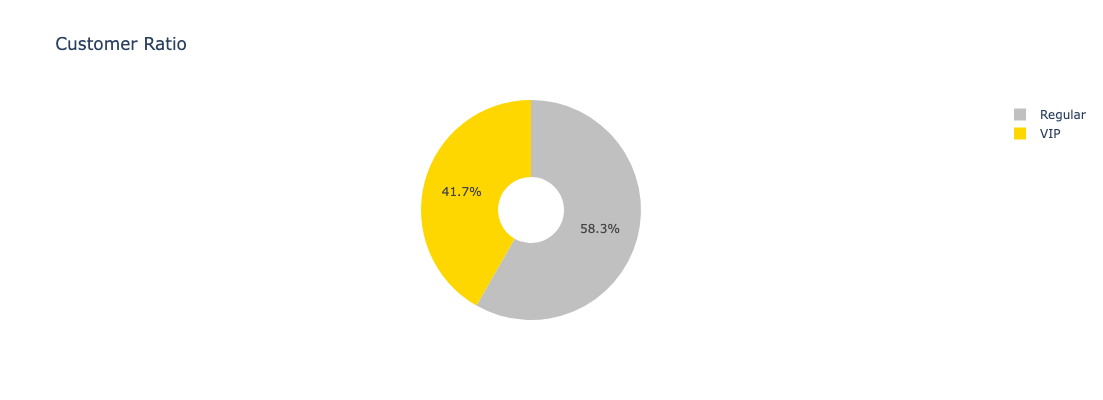

In [403]:
#VIP-Regular고객 비율 그래프

fig = px.pie(df_by_type2_prop, values=df_by_type2_prop, names=df_by_type2_prop.index,
             title='Customer Ratio', color_discrete_sequence=['silver', 'gold'], 
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [408]:
# VIP-Regular 고객 수 확인
df_by_type2 = df['customer_type2'].value_counts()
pd.DataFrame(df_by_type2)

,count
customer_type2,
Regular,2272
VIP,1628


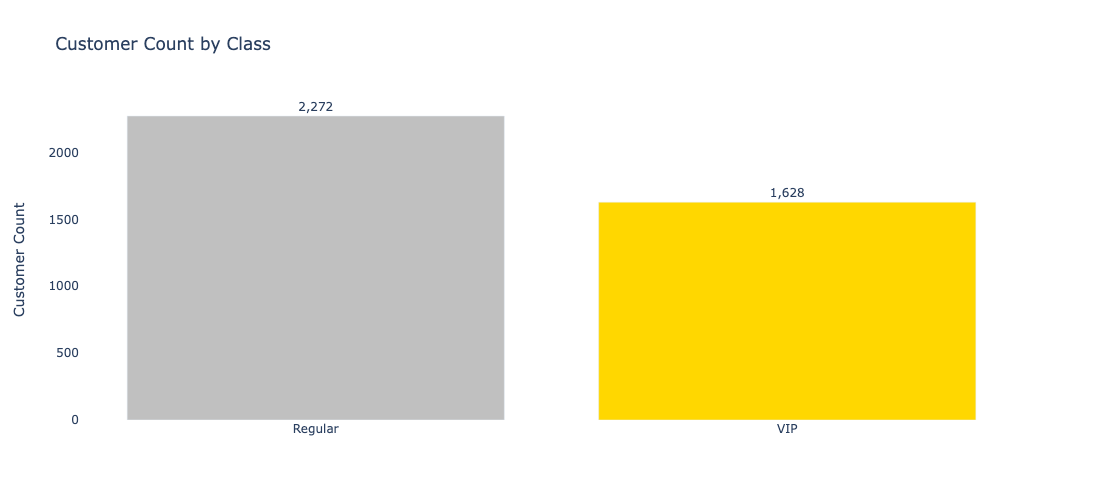

In [409]:
# VIP-Regular 고객 수 그래프

fig = px.bar(df_by_type2, x=df_by_type2.index, y=df_by_type2.values,
             title='Customer Count by Class',
             color=df_by_type2.index, 
             color_discrete_sequence=['silver', 'gold'])

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Customer Count',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [410]:
# VIP가 매출의 많은 부분을 차지하고 있으므로 VIP대상으로 프로모션을 진행하는 것이 타당해 보인다.
# VIP의 연령대와 아이템 추출하자

In [411]:
# VIP 데이터만 추출
# 이미 만들어 놓은 df가 있음 : df_by_VIP = df[df['customer_type2']=='VIP']
df_by_VIP.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,age_group,customer_type2
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,0,1,1,4,26,50대,VIP
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,0,1,1,4,26,10대,VIP
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,0,1,1,5,52,50대,VIP
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,0,1,1,5,52,20대,VIP
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,...,14,Venmo,Weekly,0,1,1,5,52,40대,VIP


In [418]:
# VIP고객 연령대 확인
df_by_VIP = df_by_VIP['age_group'].value_counts().sort_index()
pd.DataFrame(df_by_VIP)

,count
age_group,
10대,64
20대,312
30대,295
40대,313
50대,333
60대,286
70대,25


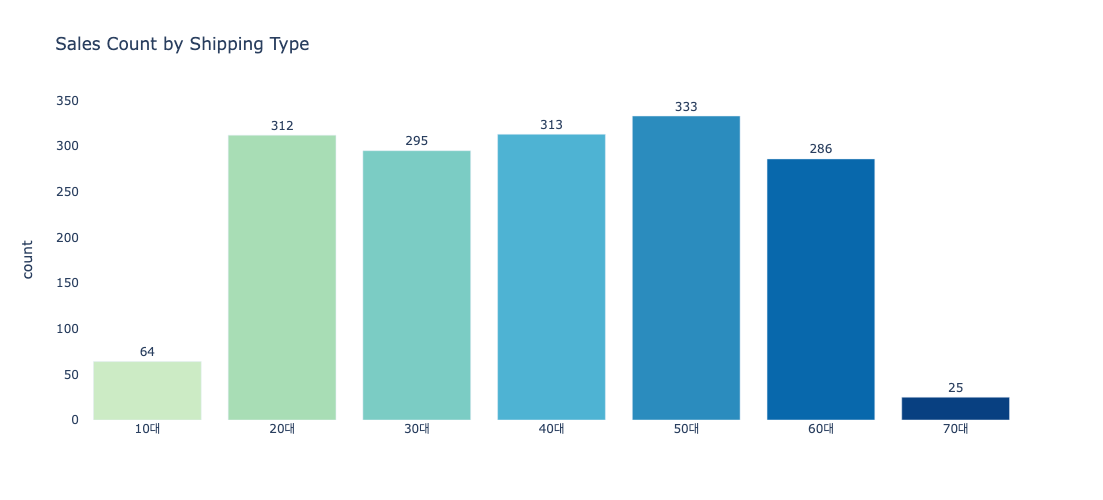

In [431]:
# VIP고객 연령대 그래프

fig = px.bar(df_by_VIP, x=df_by_VIP.index, y='count',
             title='Sales Count by Shipping Type',
             color=df_by_VIP.index,  
             color_discrete_sequence=px.colors.sequential.GnBu[2:])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',   
    width=600,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [423]:
# 봄시즌 남성 VIP 데이터만 추출

df_by_spring_VIP_men = df[(df['Season']=='Spring') & (df['customer_type2']=='VIP') & (df['Gender']=='Male')]
df_by_spring_VIP_men.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,age_group,customer_type2,projected_revenue
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,0,1,1,5,52,50대,VIP,3120
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,0,1,1,5,52,20대,VIP,3120
13,14,65,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,...,PayPal,Weekly,0,1,1,5,52,60대,VIP,3120
16,17,25,Male,Sunglasses,Accessories,36,Alabama,S,Gray,Spring,...,Debit Card,Bi-Weekly,0,1,1,4,26,20대,VIP,1560
49,50,68,Male,Hoodie,Clothing,30,New Jersey,S,Indigo,Spring,...,Debit Card,Bi-Weekly,0,1,1,4,26,60대,VIP,1560


In [425]:
# 봄시즌 남성 VIP고객 구입 아이템 확인
df_by_spring_VIP_men_item = df_by_spring_VIP_men['Item Purchased'].value_counts().sort_values(ascending=False).head(8)
pd.DataFrame(df_by_spring_VIP_men_item)

,count
Item Purchased,
Gloves,16
Shorts,16
Sweater,16
Belt,14
Backpack,14
Skirt,14
Sneakers,14
T-shirt,14


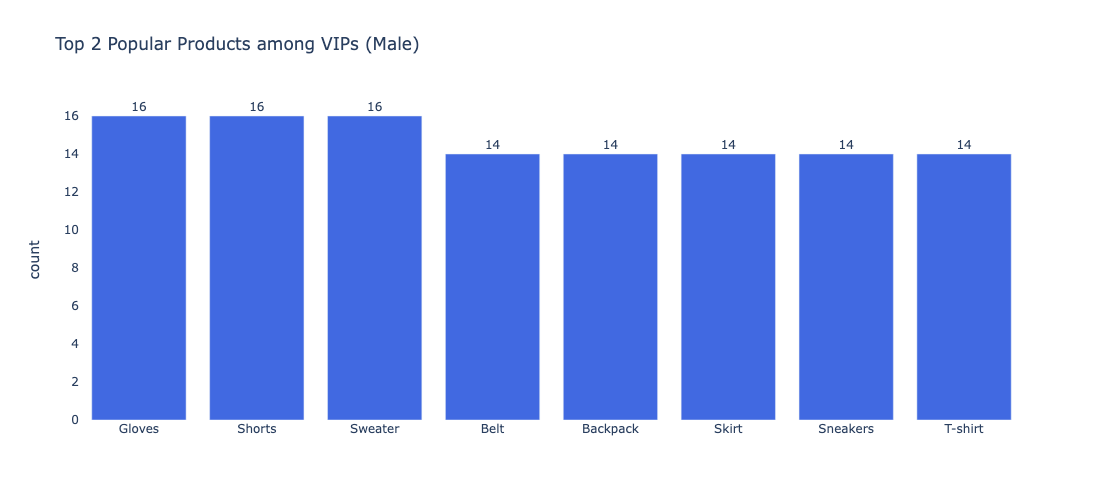

In [447]:
# 봄시즌 남성 VIP 구입 아이템 수 그래프


fig = px.bar(df_by_spring_VIP_men_item, x=df_by_spring_VIP_men_item.index, y='count',
             title='Top 2 Popular Products among VIPs (Male)',
             color=df_by_spring_VIP_men_item.index,  
             color_discrete_sequence=['royalblue'])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',   
    width=600,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [442]:
# 봄시즌 여성 VIP고객  데이터만 추출

df_by_spring_VIP_women = df[(df['Season']=='Spring') & (df['customer_type2']=='VIP') & (df['Gender']=='Female')]
df_by_spring_VIP_women.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,age_group,customer_type2,projected_revenue
2669,2670,39,Female,Belt,Accessories,28,Illinois,L,Teal,Spring,...,Credit Card,Weekly,1,0,0,5,52,30대,VIP,3120
2676,2677,43,Female,Backpack,Accessories,77,Kentucky,M,Maroon,Spring,...,Cash,Fortnightly,1,0,0,4,26,40대,VIP,1560
2678,2679,33,Female,Belt,Accessories,91,Montana,M,Magenta,Spring,...,Credit Card,Bi-Weekly,1,0,0,4,26,30대,VIP,1560
2704,2705,52,Female,Dress,Clothing,54,Tennessee,L,Beige,Spring,...,Debit Card,Weekly,1,0,0,5,52,50대,VIP,3120
2705,2706,65,Female,Jacket,Outerwear,81,Washington,S,Turquoise,Spring,...,Credit Card,Bi-Weekly,1,0,0,4,26,60대,VIP,1560


In [444]:
# 봄시즌 여성 VIP고객 구입 아이템 확인
df_by_spring_VIP_women_item = df_by_spring_VIP_women['Item Purchased'].value_counts().sort_values(ascending=False).head(6)
pd.DataFrame(df_by_spring_VIP_women_item)

,count
Item Purchased,
Boots,11
Coat,8
Blouse,8
Sweater,8
Handbag,8
Skirt,8


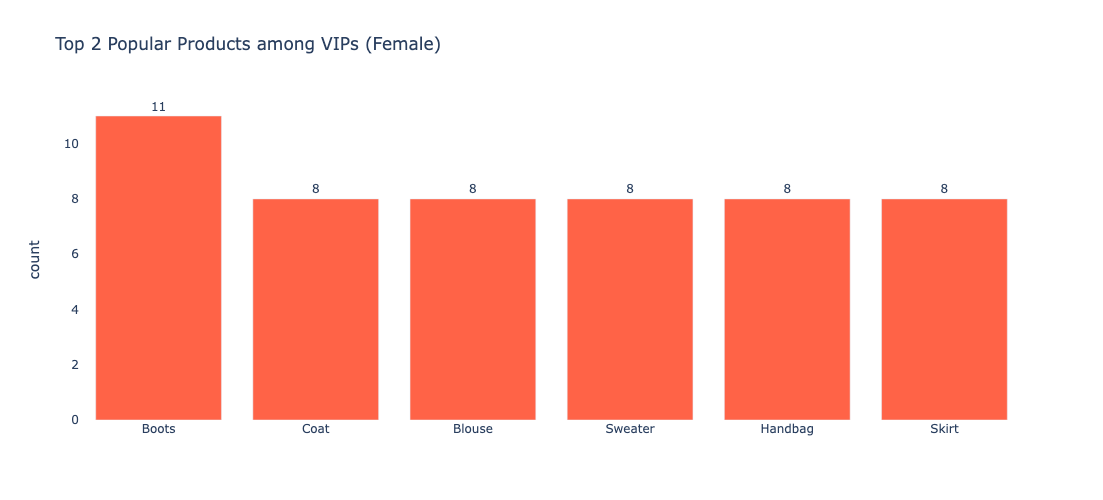

In [450]:
# 봄시즌 여성 VIP고객 구입 아이템 수 그래프

fig = px.bar(df_by_spring_VIP_women_item, x=df_by_spring_VIP_women_item.index, y='count',
             title='Top 2 Popular Products among VIPs (Female)',
             color=df_by_spring_VIP_women_item.index,  
             color_discrete_sequence=['tomato'])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',   
    width=600,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [90]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'gender',
       'subscription_status', 'discount_applied', 'frequency_of_purchases',
       'purchases_times_per_annual', 'Age2', 'customer_type2',
       'projected_revenue'],
      dtype='object')

In [91]:
df.iloc[0]

Customer ID                             1
Age                                    55
Gender                               Male
Item Purchased                     Blouse
Category                         Clothing
Purchase Amount (USD)                  53
Location                         Kentucky
Size                                    L
Color                                Gray
Season                             Winter
Review Rating                         3.1
Subscription Status                   Yes
Shipping Type                     Express
Discount Applied                      Yes
Promo Code Used                       Yes
Previous Purchases                     14
Payment Method                      Venmo
Frequency of Purchases        Fortnightly
gender                                  0
subscription_status                     1
discount_applied                        1
frequency_of_purchases                  4
purchases_times_per_annual             26
Age2                              

In [92]:
# 클러스터링 시도

In [93]:
from sklearn.cluster import KMeans

In [94]:
# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=2)

In [95]:
clustering_df = df[['Purchase Amount (USD)', 'frequency_of_purchases']]

In [96]:
kmeans.fit(clustering_df)

KMeans(n_clusters=2)

In [97]:
# 클러스터 예측
labels = kmeans.predict(clustering_df)

In [98]:
labels

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [99]:
df['rabel'] = labels

In [100]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,Age2,customer_type2,projected_revenue,rabel
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Fortnightly,0,1,1,4,26,50,VIP,1560,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Fortnightly,0,1,1,4,26,10,VIP,1560,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Weekly,0,1,1,5,52,50,VIP,3120,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Weekly,0,1,1,5,52,20,VIP,3120,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Annually,0,1,1,1,1,40,Regular,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,Weekly,1,0,0,5,52,40,VIP,3120,1
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,Bi-Weekly,1,0,0,4,26,50,VIP,1560,1
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,Quarterly,1,0,0,2,4,40,Regular,240,1
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,Weekly,1,0,0,5,52,40,VIP,3120,0


In [101]:
df['rabel'].value_counts()

rabel
0    1963
1    1937
Name: count, dtype: int64

In [102]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [103]:
silhouette_score(clustering_df, labels)

0.6269755942547909

In [104]:
from kmeans_visual import visualize_silhouette

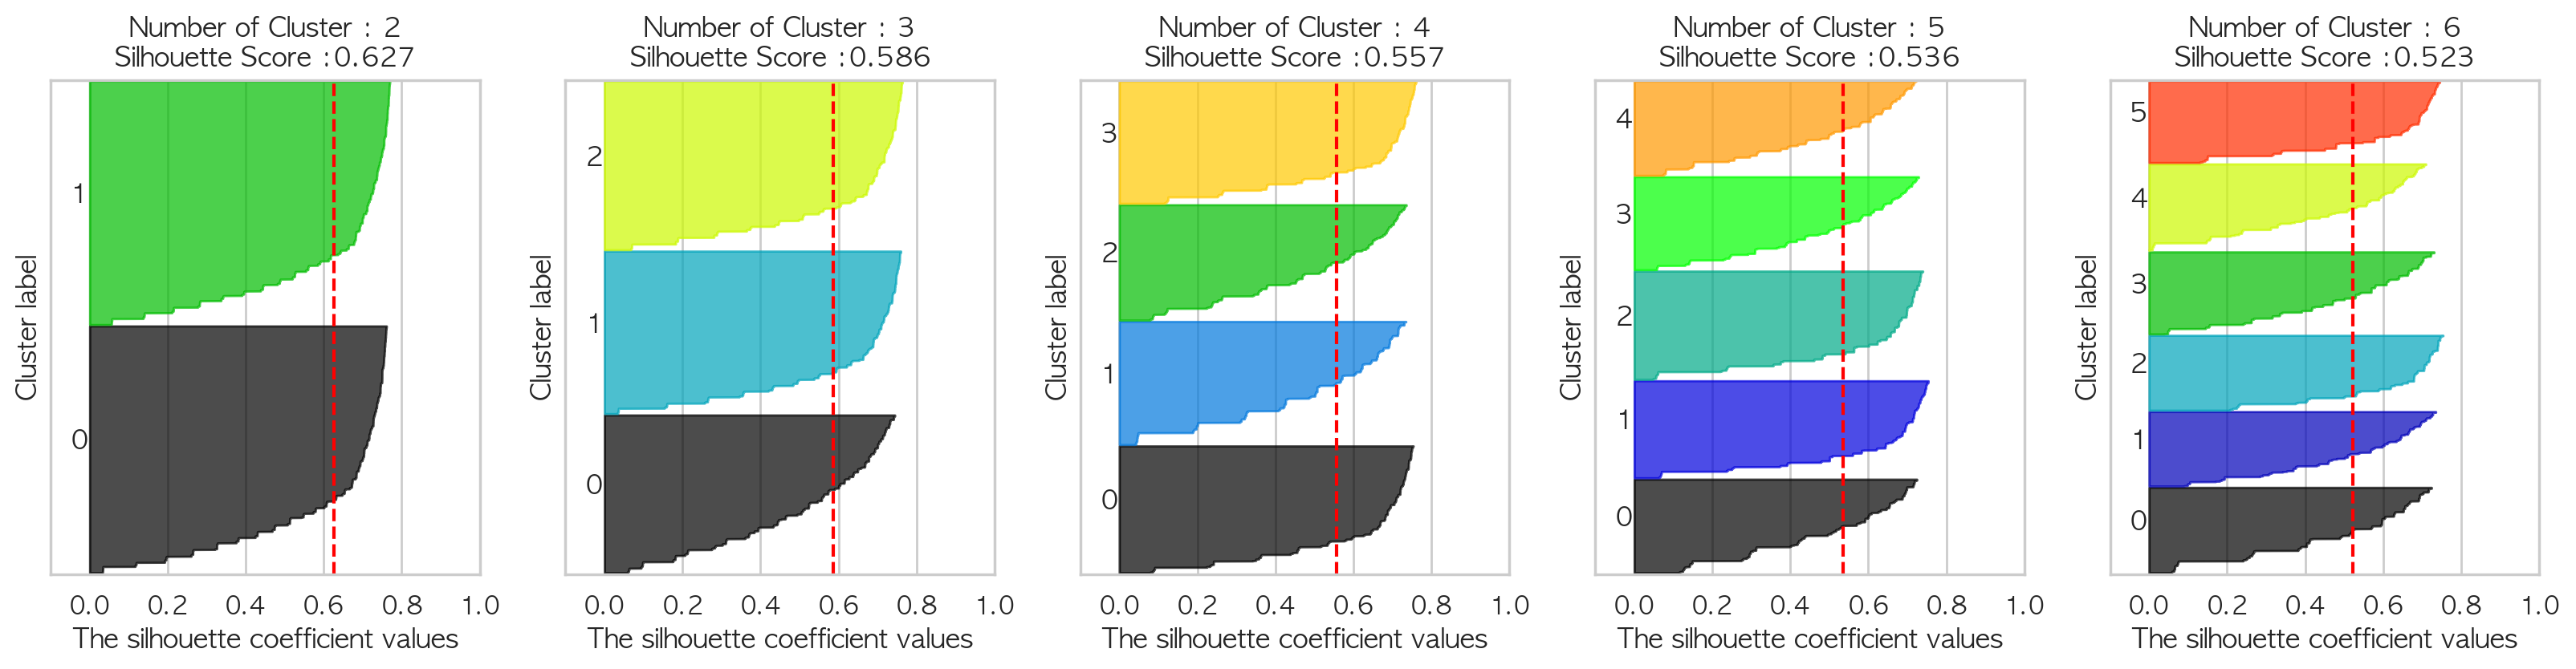

In [105]:
visualize_silhouette([2, 3, 4, 5, 6], clustering_df)

In [106]:
df['label'] = labels

In [109]:
# 예시

# from scipy import stats
# import pandas as pd

# # 고객 구매 정보가 담긴 DataFrame 생성 (예시)
# data = {
#     '그룹': ['A', 'A', 'B', 'B', 'C'],
#     '구매횟수': [10, 15, 20, 25, 30],
#     '구매금액': [1000, 1500, 2000, 2500, 3000]
# }
# df = pd.DataFrame(data)

# # ANOVA 실행
# anova_result = stats.f_oneway(df['구매횟수'], df['구매금액'])

# # p-value 출력
# p_value = anova_result.pvalue
# print("p-value:", p_value)

In [110]:
# 각 컬럼끼리 p-value 계산?
